In [55]:
#KIVANÇ ADIGÜZEL 191180003 ASSIGNMENT 3
#THERE ARE 3 QUESTIONS BUT I MADE SOME EXTRA MOVES FOR CHECKING DETAILS WHICH DIDNOT EFFECT THE RIGHT ANSWERS--ALL IS DONE
import sklearn as sl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import seaborn as sb
from sklearn import datasets
from sklearn.model_selection import train_test_split
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz


In [56]:
#iris dataset
irisData = datasets.load_iris()

#CREATING DF 
irisDAF = pd.DataFrame(irisData.data, columns= irisData.feature_names)

#SPECIES TO DF
irisDAF['species'] =  irisData.target
irisDAF.info()
irisDAF.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [57]:
from sklearn.utils import shuffle
#Randomizing data according the document 
irisDAF = shuffle(irisDAF)

In [58]:
# X AND Y FOR (SPECIES COLUMN AND OTHER VALUES)
X= irisDAF[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = irisDAF['species']
# %75 TRAIN  %25 TEST SPLIT
tra_X, test_X, tra_y, test_y = train_test_split(X,y, test_size = 0.25,shuffle = 1)



In [59]:
#RF CLASSIFIER AND MODEL TRAINIG 
model = RandomForestClassifier(n_estimators=10, criterion= 'gini')
model.fit(tra_X,tra_y)
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
y_pred=model.predict(test_X)

In [60]:
# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(irisData.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [61]:
# SHOW DF
import pandas as pd
data=pd.DataFrame({
    'sepal length':irisData.data[:,0],
    'sepal width':irisData.data[:,1],
    'petal length':irisData.data[:,2],
    'petal width':irisData.data[:,3],
    'species':irisData.target
})
data.head()


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
#CHECKING THE DETAILS
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=irisData.feature_names).sort_values(ascending=False)
feature_imp


petal width (cm)     0.482218
petal length (cm)    0.321213
sepal length (cm)    0.133668
sepal width (cm)     0.062902
dtype: float64

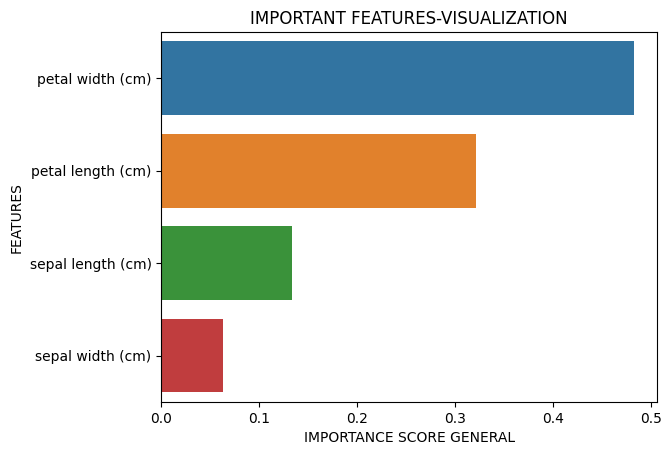

In [63]:
#that part is not in the our assignment,I did it for see the importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('IMPORTANCE SCORE GENERAL')
plt.ylabel('FEATURES')
plt.title("IMPORTANT FEATURES-VISUALIZATION")
plt.legend
plt.show()

In [64]:
#Report the accuracy, precision, recall
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



	CONFUSION MATRIX


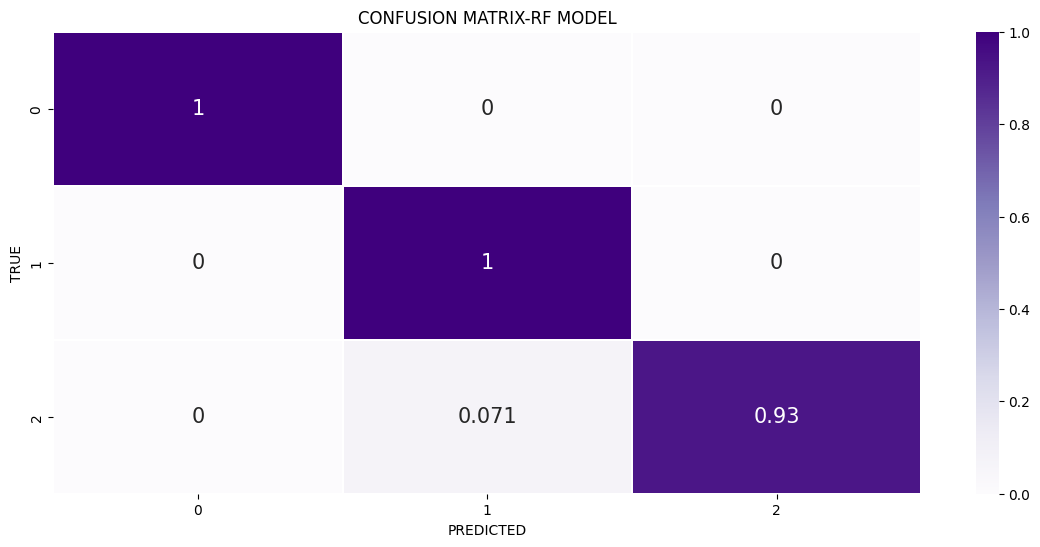

In [65]:
# Predict Part---according to the test_x
pred = model.predict(test_X)

#FOR REPORT WE SHOULD IMPORT THEM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# CONF MATRIX
matrix = confusion_matrix(test_y,pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# VISUALIZE--purple better 
plot.figure(figsize=(14,6))
sb.heatmap(matrix, annot=True,
           annot_kws={'size':15},
           cmap=plot.cm.Purples,
           linewidths=0.2)
plot.xlabel('PREDICTED')
plot.ylabel('TRUE')
plot.title('CONFUSION MATRIX-RF MODEL')
print("\tCONFUSION MATRIX")
plot.show()

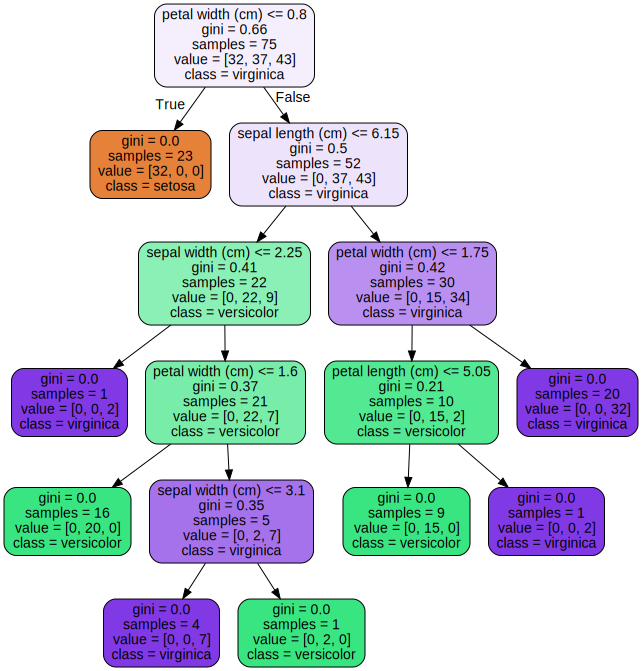

In [66]:
import graphviz
# GRAPHVIZ SHOULD BE DONE BEFORE RUN**IF NOT RETURNS AN ERROR
from random import randrange

#RANDOM FROM RF 0-9
#CHOSENONE IS RANDOM!!!! --GIVE DIFFERENT OUTPUT-VISUAL EVERY TIME ---WHICH EXPECTED FROM US ACCORDING TO DOCUMENT
chosenone = model.estimators_[randrange(10)]

#DEC TREE GENERATE
dot_data = export_graphviz(chosenone, out_file=None, 
                feature_names = irisData.feature_names,
                class_names = irisData.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
#FINITO